In [1]:
from Image_Classification.Linear.MLP_Mixer import *
from Image_Classification.CNN.normal_CNN import * # 작동 잘됨
from Image_Classification.CNN.residual_CNN import * # 작동 잘됨
from util import *

import torch
from terminaltables import AsciiTable

In [2]:
BATCH_SIZE = 500

kernal_list_normal_CNN = [16, 16,'p', 32, 32, 'p', 64, 64, 'p', 128, 128, 'p', 256, 256]
kernal_list_residual_CNN = [32, 32, 64, 64, 64, 64, 128, 128, 128]

# train_dataloader, classes_num, dataset = get_ImageNet_Train_DataLoader(dataset_root = dataset_root, image_size = image_size[1:], num_workers = 6, BATCH_SIZE = BATCH_SIZE, image_num = 20000)
loss_function = torch.nn.CrossEntropyLoss()

In [3]:
# 데이터셋 생성
classes_num = 10

train_dataloader, test_dataloader, image_size = get_cifar_dataset(classes_num = classes_num, batch_size = BATCH_SIZE)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
normal_cnn = normal_CNN(input_size = image_size, kernal_list = kernal_list_normal_CNN, num_classes = classes_num, activation_func = 'relu', batch_normalization_use = True, device = 'cuda')
residual_cnn = residual_CNN(input_size = image_size, kernal_list = kernal_list_residual_CNN, num_classes = classes_num, Residual_Block_size = 'small')

# mlp mixer 실험
# (3, 32, 32) 크기의 cifar 데이터셋으로 학습시키는걸 고려
# 입력받은 이미지를 가지고 C사이즈를 가진 S개의 토큰을 생성.  
mlp_mixer_S4 = MLP_Mixer(input_size=image_size, patch_size=4, C=128, N=6, classes_num=classes_num).to('cuda')
mlp_mixer_S2 = MLP_Mixer(input_size=image_size, patch_size=2, C=128, N=6, classes_num=classes_num).to('cuda')
mlp_mixer_B4 = MLP_Mixer(input_size=image_size, patch_size=4, C=192, N=8, classes_num=classes_num).to('cuda')
mlp_mixer_B2 = MLP_Mixer(input_size=image_size, patch_size=2, C=192, N=8, classes_num=classes_num).to('cuda')



/home/minkyukim/anaconda3/envs/PyTorch_p39/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:
print(AsciiTable(
                [
                    ["model", "parameter num"],
                    ["normal_cnn", sum(param.numel() for param in normal_cnn.parameters())],
                    ["residual_cnn", sum(param.numel() for param in residual_cnn.parameters())],
                    ["mlp_mixer_S4", sum(param.numel() for param in mlp_mixer_S4.parameters())],
                    ["mlp_mixer_S2", sum(param.numel() for param in mlp_mixer_S2.parameters())],
                    ["mlp_mixer_B4", sum(param.numel() for param in mlp_mixer_B4.parameters())],
                    ["mlp_mixer_B2", sum(param.numel() for param in mlp_mixer_B2.parameters())]
                ]).table)

+--------------+---------------+
| model        | parameter num |
+--------------+---------------+
| normal_cnn   | 1183322       |
| residual_cnn | 1134026       |
| mlp_mixer_S4 | 273674        |
| mlp_mixer_S2 | 1062026       |
| mlp_mixer_B4 | 698186        |
| mlp_mixer_B2 | 1756106       |
+--------------+---------------+


In [6]:
epochs = 600
k = 1

# result_list : train_loss, train_acc, test_loss, test_acc 순으로 들어있는 리스트
normal_cnn, normal_cnn_result_list = train(model = normal_cnn, EPOCH = epochs, loss_function = loss_function, optimizer_name = 'adam', train_dataset_loader = train_dataloader, test_dataset_loader = test_dataloader, k = k, gradient_clipping = False, linear_burn_up = True, device = 'cuda')
residual_cnn, residual_result_list = train(model = residual_cnn, EPOCH = epochs, loss_function = loss_function, optimizer_name = 'adam', train_dataset_loader = train_dataloader, test_dataset_loader = test_dataloader, k = k, gradient_clipping = False, linear_burn_up = True, device = 'cuda')
mlp_mixer_S4, mlp_mixer_S4_result_list = train(model = mlp_mixer_S4, EPOCH = epochs, loss_function = loss_function, optimizer_name = 'adam', train_dataset_loader = train_dataloader, test_dataset_loader = test_dataloader, k = k, gradient_clipping = False, linear_burn_up = True, device = 'cuda')
mlp_mixer_S2, mlp_mixer_S2_result_list = train(model = mlp_mixer_S2, EPOCH = epochs, loss_function = loss_function, optimizer_name = 'adam', train_dataset_loader = train_dataloader, test_dataset_loader = test_dataloader, k = k, gradient_clipping = False, linear_burn_up = True, device = 'cuda')
mlp_mixer_B4, mlp_mixer_B4_result_list = train(model = mlp_mixer_B4, EPOCH = epochs, loss_function = loss_function, optimizer_name = 'adam', train_dataset_loader = train_dataloader, test_dataset_loader = test_dataloader, k = k, gradient_clipping = False, linear_burn_up = True, device = 'cuda')
mlp_mixer_B2, mlp_mixer_B2_result_list = train(model = mlp_mixer_B2, EPOCH = epochs, loss_function = loss_function, optimizer_name = 'adam', train_dataset_loader = train_dataloader, test_dataset_loader = test_dataloader, k = k, gradient_clipping = False, linear_burn_up = True, device = 'cuda')

data_list = [normal_cnn_result_list, residual_result_list, mlp_mixer_S4_result_list, mlp_mixer_S2_result_list, mlp_mixer_B4_result_list, mlp_mixer_B2_result_list]


====training start====


Evaluation Epoch 599: 100%|███████████████████| 100/100 [00:01<00:00, 88.27it/s]


====training end====
====training start====


Evaluation Epoch 599: 100%|███████████████████| 100/100 [00:01<00:00, 92.41it/s]


====training end====
====training start====


Evaluation Epoch 599: 100%|███████████████████| 100/100 [00:02<00:00, 39.43it/s]


====training end====
====training start====


Evaluation Epoch 599: 100%|███████████████████| 100/100 [00:07<00:00, 14.25it/s]


====training end====
====training start====


Evaluation Epoch 599: 100%|███████████████████| 100/100 [00:04<00:00, 22.43it/s]


====training end====
====training start====


Evaluation Epoch 599: 100%|███████████████████| 100/100 [00:13<00:00,  7.29it/s]


====training end====


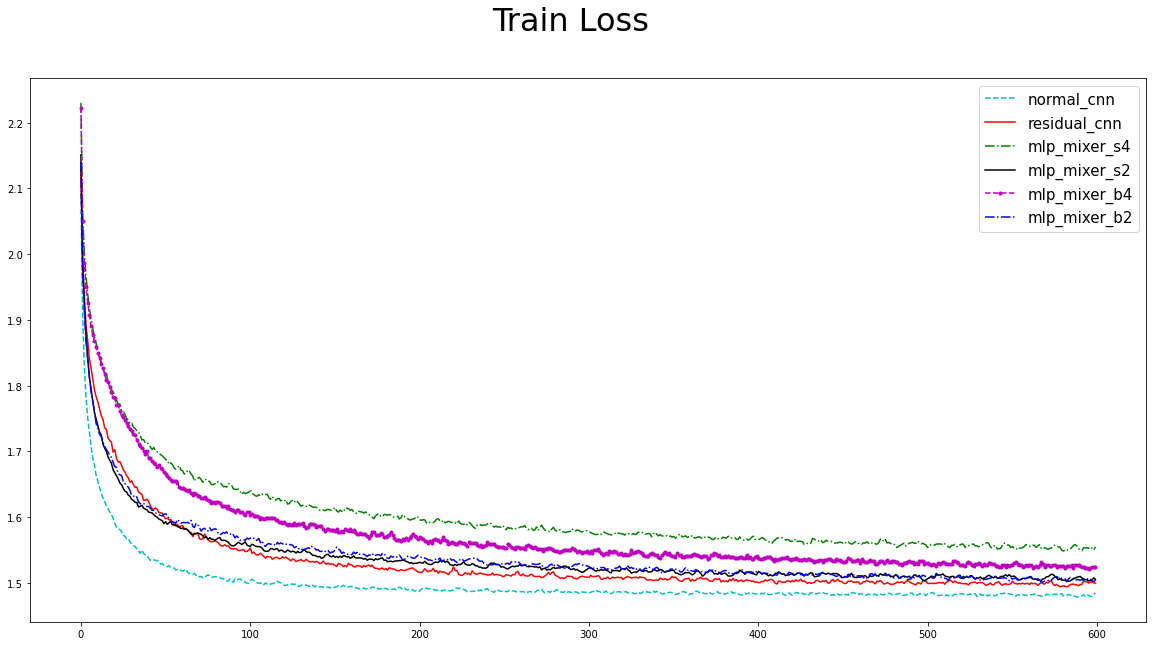

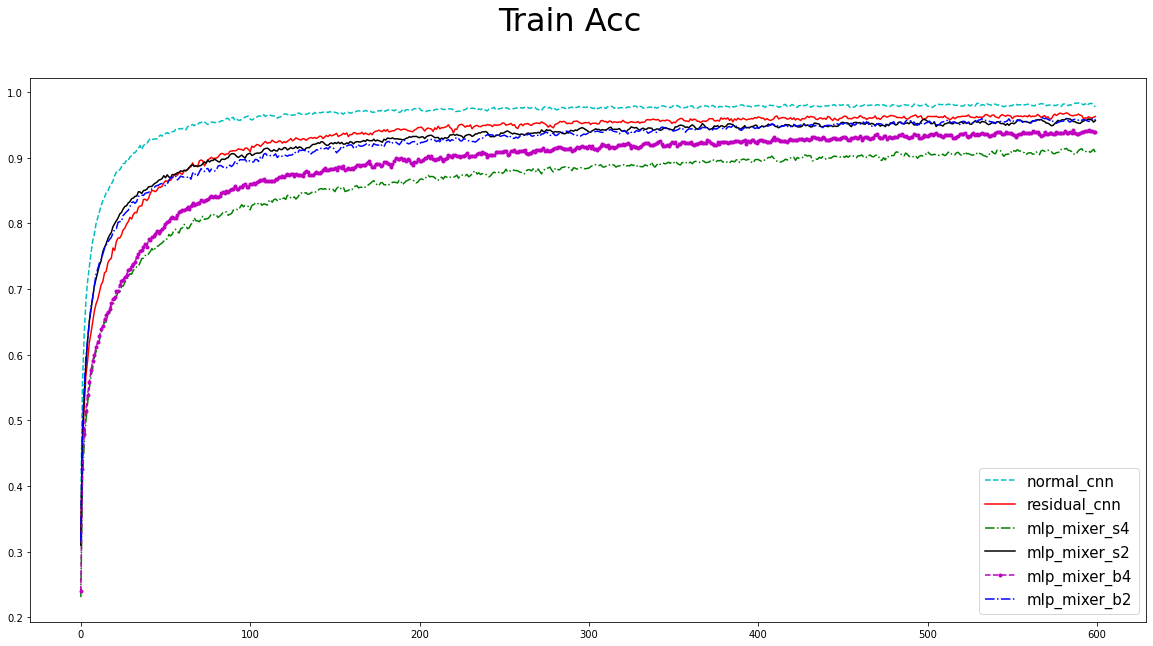

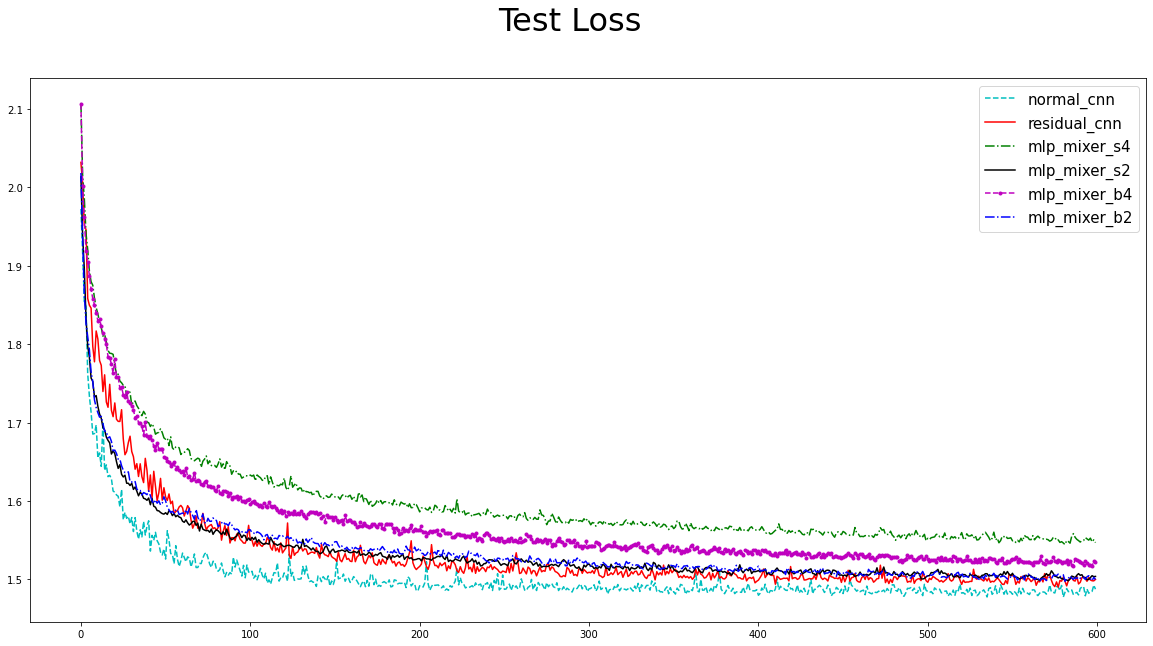

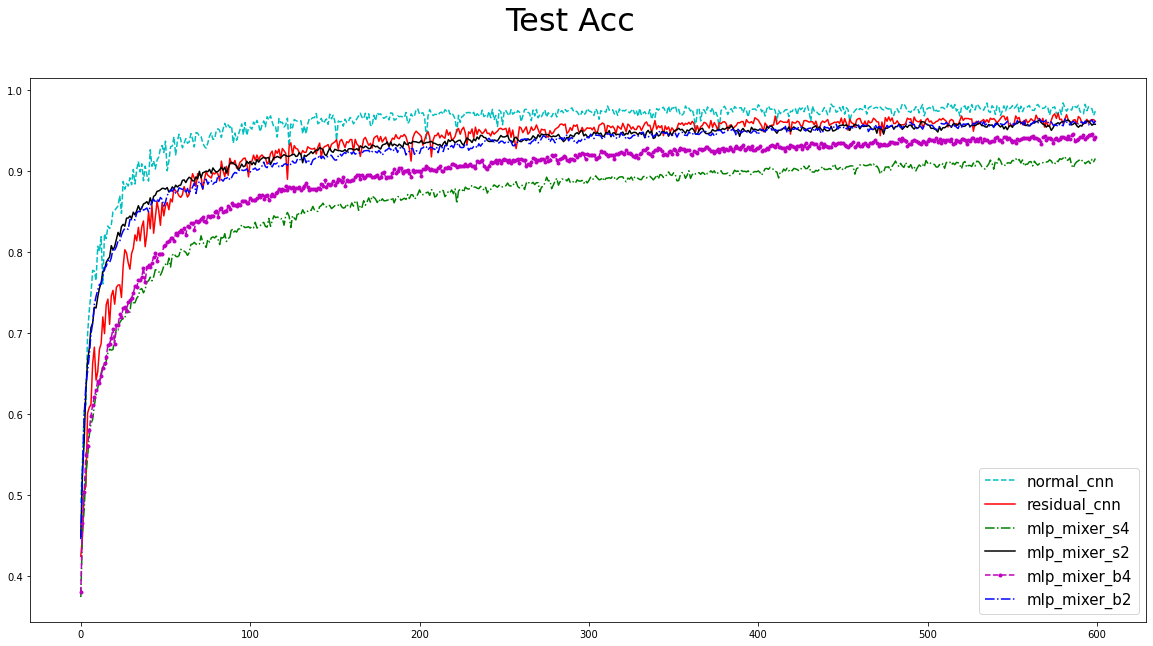

In [9]:
plot_result(data_list)